In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
! cp -r /content/drive/MyDrive/ML_PROJECTS/Classification/Titanic_Survival_Prediction/titanic.zip /content

In [3]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1 = survived
0 = didn't survive


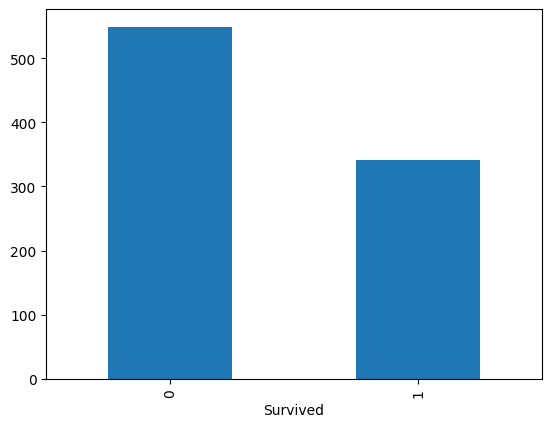

In [8]:
train_df['Survived'].value_counts().plot.bar()
print("1 = survived\n0 = didn't survive")

In [9]:
train_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


In [10]:
## since name is not going to play role in the survival rate, we remove that from our df.
## PassengerID either have no relationship with survival
train_df = train_df.drop('Name', axis=1)
train_df = train_df.drop('PassengerId', axis=1)
train_df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
694,0,1,male,60.0,0,0,113800,26.55,NaN,S


In [11]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train_df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object
Embarked,object


## Preprocessing our data

In [13]:
cat_features = ['Sex', 'Cabin', 'Embarked']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', num_transformer, num_features)
    ]
)

## Spliting data into feature and label

In [14]:
x = train_df.drop('Survived', axis=1)
y = train_df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [28]:
## RandomForestClassifier
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model1.fit(x_train, y_train)
model1.score(x_test, y_test)

0.7988826815642458

In [29]:
## XGBClassifier
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])
model2.fit(x_train, y_train)
model2.score(x_test, y_test)

0.7988826815642458

In [30]:
## GradientBoostingClassifier
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
model3.fit(x_train, y_train)
model3.score(x_test, y_test)

0.8044692737430168

In [40]:
## Grid Search CV
param_grid = {
    "preprocessor__num__imputer__strategy": ['mean', 'median'],
    "classifier__n_estimators": [100, 200, 400],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth": [3, 5, 7],
    "classifier__min_samples_split": [2, 4],
    "classifier__min_samples_leaf": [1, 2, 3]
}
gs_model3 = GridSearchCV(
    estimator=model3,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
gs_model3.fit(x_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END classifier__learning_rate=0.01, cla

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Cabin',
                                                                          'Embarked']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardS...
                                                                          'Parch',
                                                                          'Fare'])])),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.05, 0.1],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__min_samples_leaf': [1, 2, 3],
                         'classifier__min_samples_split': [2, 4],
                         'classifier__n_estimators': [100, 200, 400],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [41]:
gs_model3.score(x_test, y_test)

0.8100558659217877

In [42]:
gs_model3.best_params_

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [43]:
test_df = pd.read_csv('/content/test.csv')
passenger_ids = test_df['PassengerId'].copy()
passenger_ids

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [44]:
result = gs_model3.predict(test_df)

In [45]:
output = pd.DataFrame({"PassengerId":passenger_ids,"Survived":result})
output.to_csv("/content/drive/MyDrive/ML_PROJECTS/Classification/Titanic_Survival_Prediction/submission.csv",index=False)

<Axes: xlabel='Survived'>

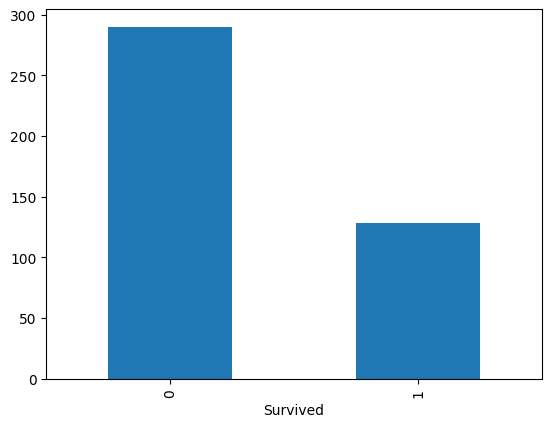

In [47]:
df=pd.read_csv('/content/drive/MyDrive/ML_PROJECTS/Classification/Titanic_Survival_Prediction/submission.csv')
df['Survived'].value_counts().plot.bar()